In [1]:
#load packages
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import rasterio
from pyproj import CRS


In [2]:
# load shapefiles
health_facilities = gpd.read_file(os.path.abspath('datasets/health_facilities.shp'))
patients = gpd.read_file(os.path.abspath('datasets/patient.shp'))
roads = gpd.read_file(os.path.abspath('datasets/road.shp'))
districts = gpd.read_file(os.path.abspath('datasets/district.shp'))

In [3]:
health_facilities.head

<bound method NDFrame.head of    FID_                           Name   Latitude  Longitude  \
0   861  Chalabesa Rural Health Centre -11.481887  31.084718   
1  1871              Chaya Health Post -11.836500  31.446669   
2  1872   Chibansa Urban Health Centre -11.906580  31.436493   

                     geometry  
0  POINT (31.49772 -12.27351)  
1  POINT (32.07443 -11.36278)  
2  POINT (31.38183 -11.83039)  >

In [4]:
# Define projection
#myCRS = ccrs.UTM(29)
crs_utm = ccrs.UTM(34)
#crs_utm = CRS.from_epsg(4326)
patients = patients.to_crs(crs_utm)
health_facilities = health_facilities.to_crs(crs_utm)
roads = roads.to_crs(crs_utm)
districts = districts.to_crs(crs_utm)

In [5]:
# loop through each health facility
for i, row in health_facilities.iterrows():
    # extract facility location
    facility_location = row['geometry']
    # create buffer around facility location
    buffer_radius = 5000  # meters
    buffer_distance = f'{buffer_radius} meters'
    facility_buffer = facility_location.buffer(buffer_radius)


In [6]:
# Count patients within the buffer for each facility
for i, facility in health_facilities.iterrows():
    patients_within_buffer = patients[patients.geometry.within(facility_buffer)]
    print(f"Inside Facility, {facility['Name']} has {len(patients_within_buffer)} patients within {buffer_radius} meters.")

# Count patients outside the buffer for each facility
for i, facility in health_facilities.iterrows():
    patients_outside_buffer = patients[~patients.geometry.within(facility_buffer)]
    print(f"Outside Facility, {facility['Name']} has {len(patients_outside_buffer)} patients outside {buffer_radius} meters.")


Inside Facility, Chalabesa Rural Health Centre has 4 patients within 5000 meters.
Inside Facility, Chaya Health Post has 4 patients within 5000 meters.
Inside Facility, Chibansa Urban Health Centre has 4 patients within 5000 meters.
Outside Facility, Chalabesa Rural Health Centre has 28 patients outside 5000 meters.
Outside Facility, Chaya Health Post has 28 patients outside 5000 meters.
Outside Facility, Chibansa Urban Health Centre has 28 patients outside 5000 meters.


In [45]:
# Calculate the distance patients outside the buffer travel to access HIV services
for i, facility in health_facilities.iterrows():
    patients_outside_buffer = patients[~patients.geometry.within(facility_buffer)]
    patients_outside_buffer["distance_to_facility"] = patients_outside_buffer.geometry.distance(facility.geometry)
    print(f"Patients outside {buffer_radius} meters from facility {facility['Name']} travel an average of {patients_outside_buffer['distance_to_facility'].mean()} meters to access HIV services.")

Patients outside 5000 meters from facility Chalabesa Rural Health Centre travel an average of 59106.1131911757 meters to access HIV services.
Patients outside 5000 meters from facility Chaya Health Post travel an average of 74450.07303719182 meters to access HIV services.
Patients outside 5000 meters from facility Chibansa Urban Health Centre travel an average of 38546.079901369485 meters to access HIV services.


C:\Users\SNyimbili\AppData\Local\anaconda3\envs\egm722py\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\SNyimbili\AppData\Local\anaconda3\envs\egm722py\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\SNyimbili\AppData\Local\anaconda3\envs\egm722py\Lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is

AttributeError: 'Polygon' object has no attribute 'geometry'

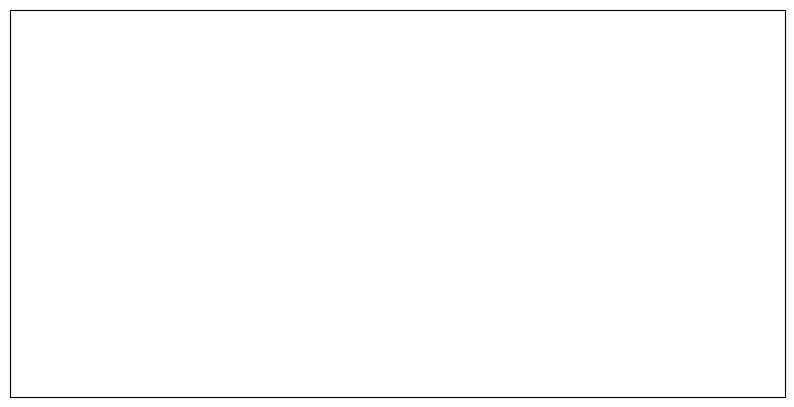

In [27]:
 # extract patient locations within buffer
#patients_within_buffer = health_facilities.loc[health_facilities.within(facility_buffer)]
#num_patients_within_buffer = len(patients_within_buffer)

# extract patient locations outside buffer
#patients_outside_buffer = health_facilities.loc[~health_facilities.within(facility_buffer)]
#num_patients_outside_buffer = len(patients_outside_buffer)
    

In [25]:
# extract viral suppression status within buffer
#suppressed_within_buffer = patients_within_buffer.loc[patients_within_buffer['viral_suppression'] == 'Suppressed']
#num_suppressed_within_buffer = len(suppressed_within_buffer)
#unsuppressed_within_buffer = patients_within_buffer.loc[patients_within_buffer['viral_suppression'] == 'Unsuppressed']
#num_unsuppressed_within_buffer = len(unsuppressed_within_buffer)
    
# extract viral suppression status outside buffer
#suppressed_outside_buffer = patients_outside_buffer.loc[patients_outside_buffer['viral_suppression'] == 'Suppressed']
#num_suppressed_outside_buffer = len(suppressed_outside_buffer)
#unsuppressed_outside_buffer = patients_outside_buffer.loc[patients_outside_buffer['viral_suppression'] == 'Unsuppressed']
#num_unsuppressed_outside_buffer = len(unsuppressed_outside_buffer)

#for Name in health_facilities['Name']:
    #print(f"Results for {row['Name']}:\n"
         # f"Total patients within {buffer_distance}: {num_patients_within_buffer}\n"
          #f"Total patients outside {buffer_distance}: {num_patients_outside_buffer}\n")

#for name in df['NAME']:
    #print(Name)

Chalabesa Rural Health Centre
Chaya Health Post
Chibansa Urban Health Centre
